In [87]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
!ls "/content/drive/My Drive/"


'13 th edition Modern Database Management, eBook, Global Edition.pdf'
 347e8e24-1a7c-4522-b387-4d26a66f1c97.jpg
 56DF2644-965F-4F91-BCF0-1BB7436DD769.pdf
 973e98c0-a629-42ff-8e72-a36c32b4da2f.jpg
'Colab Notebooks'
 complaints_imputed.csv
'Copy of combined_complaints.csv'
'Copy of Data 1 (1).csv'
'Copy of Data 1.csv'
'desilolli .zip'
 e008e2e0-3b2d-467e-8ef2-84237d727543.jpg
 IMG_2039.mov
 IMG_2159.mov
 IMG_3360.mov
 IMG_4326.jpeg
 IMG_4337.jpeg
 IMG_4340.jpeg
 IMG_4474.mov
 IMG_6338.jpeg
 IMG_9959.jpeg
 IMG_9960.jpeg
 IMG_9963.jpeg
'Optimization Modeling With Spreadsheets 3rd edition - WILEY (2016) (1).pdf'
'Optimization Modeling With Spreadsheets 3rd edition - WILEY (2016).pdf'
'prog for ba '
'Untitled folder'
'Untitled form.gform'


In [89]:
!ls "/content/drive/My Drive/prog for ba /"



'BCIS 5110 Exam 2-Sample.ipynb'   COVIDVaccine.csv		   googleplaystore.csv
 complaints_imputed.csv		  FLAT_RCL_processed_cleaned.csv


In [90]:
dataset_path = "/content/drive/My Drive/prog for ba /complaints_imputed.csv"


In [91]:
import pandas as pd

df = pd.read_csv(dataset_path)

# Display first 5 rows
print(df.head())


<ipython-input-91-6192947cfd29>:3: DtypeWarning:

Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.



   CMPLID                    MAKETXT  \
0  179043  FORD                        
1  179044  FORD                        
2  725400  GULF STREAM                 
3  753157  VOLKSWAGEN                  
4  753158  MERCURY                     

                                            MODELTXT  YEARTXT CRASH  FAILDATE  \
0  EXPEDITION                                    ...   2008.0     Y  20091102   
1  EXPEDITION                                    ...   2008.0     Y  20091102   
2  TOURMASTER                                    ...   2008.0     N  20091201   
3  PASSAT                                        ...   2006.0     N  20091228   
4  SABLE                                         ...   2002.0     N  20080709   

  FIRE  INJURED  DEATHS                                           COMPDESC  \
0    N        0       0  VISIBILITY:POWER WINDOW DEVICES AND CONTROLS  ...   
1    N        0       0  VEHICLE SPEED CONTROL                         ...   
2    N        0       0  VISIBILITY   

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184117 entries, 0 to 1184116
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLID             1184117 non-null  int64  
 1   MAKETXT            1184117 non-null  object 
 2   MODELTXT           1184117 non-null  object 
 3   YEARTXT            1184117 non-null  float64
 4   CRASH              1184117 non-null  object 
 5   FAILDATE           1184117 non-null  int64  
 6   FIRE               1184117 non-null  object 
 7   INJURED            1184117 non-null  int64  
 8   DEATHS             1184117 non-null  int64  
 9   COMPDESC           1184117 non-null  object 
 10  STATE              1184117 non-null  object 
 11  LDATE              1184117 non-null  object 
 12  CMPL_TYPE          1184117 non-null  object 
 13  POLICE_RPT_YN      1184117 non-null  object 
 14  ORIG_OWNER_YN      1183529 non-null  object 
 15  ANTI_BRAKES_YN     1183529 non-n

**Basic Information**

**CMPLID** → Complaint ID (a unique number for each complaint).

**MAKETXT** → Car manufacturer (e.g., Ford, Toyota, etc.).

**MODELTXT** → Car model (e.g., Camry, Mustang, etc.).

**YEARTXT** → Model year of the car.

**Accident & Safety Details**

	5.	CRASH → Was there a crash? (Y = Yes, N = No).
	6.	FAILDATE → The date when the issue or failure happened.
	7.	FIRE → Did the car catch fire? (Y = Yes, N = No).
	8.	INJURED → Number of people injured.
	9.	DEATHS → Number of people who died.

**Complaint Description**

	10.	COMPDESC → Description of the problem (e.g., “Brakes failed” or “Airbags didn’t deploy”).
	11.	STATE → U.S. state where the complaint was reported.
	12.	LDATE → The last date this complaint was updated.
	13.	CMPL_TYPE → Type of complaint (e.g., Vehicle complaint, Equipment complaint).

**Car Features (Yes/No Type)**

	14.	POLICE_RPT_YN → Was a police report filed? (Y/N).
	15.	ORIG_OWNER_YN → Was the person filing the complaint the original owner? (Y/N).
	16.	ANTI_BRAKES_YN → Does the car have anti-lock brakes? (Y/N).
	17.	CRUISE_CONT_YN → Does the car have cruise control? (Y/N).

**Car Specifications**

	18.	DRIVE_TRAIN → Type of drive system (e.g., FWD = Front Wheel Drive, RWD = Rear Wheel Drive, AWD = All Wheel Drive).
	19.	FUEL_TYPE → Type of fuel (e.g., Gasoline, Diesel, Electric).
	20.	VEH_SPEED → Speed of the vehicle at the time of the issue (if available).
	21.	PROD_TYPE → Product type (V = Vehicle, E = Equipment, T = Tires, etc.).

**Medical & Towing Information**

	22.	MEDICAL_ATTN → Was medical attention required? (Y/N).
	23.	VEHICLES_TOWED_YN → Was the car towed? (Y/N).

**Other Data**

	24.	AGE → Age of the complaint (possibly the age of the car or the owner).
	25.	MILES_NEW → Mileage of the car when the issue occurred.
	26.	OCCURRENCES_NEW → Number of times this issue has happened with this vehicle.

#**Calculating percentage of missing values**#

In [93]:

# Calculate percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Convert to DataFrame and sort in descending order
missing_df = missing_percent.to_frame().reset_index()
missing_df.columns = ["Column", "Missing Percentage"]
missing_df = missing_df.sort_values(by="Missing Percentage", ascending=False)

# Display the results
print(missing_df)

               Column  Missing Percentage
17        DRIVE_TRAIN           89.606264
18          FUEL_TYPE           84.923196
19          VEH_SPEED           38.084666
16     CRUISE_CONT_YN            0.049657
22  VEHICLES_TOWED_YN            0.049657
14      ORIG_OWNER_YN            0.049657
15     ANTI_BRAKES_YN            0.049657
2            MODELTXT            0.000000
0              CMPLID            0.000000
1             MAKETXT            0.000000
9            COMPDESC            0.000000
8              DEATHS            0.000000
7             INJURED            0.000000
6                FIRE            0.000000
5            FAILDATE            0.000000
4               CRASH            0.000000
3             YEARTXT            0.000000
13      POLICE_RPT_YN            0.000000
10              STATE            0.000000
11              LDATE            0.000000
12          CMPL_TYPE            0.000000
20          PROD_TYPE            0.000000
21       MEDICAL_ATTN            0

**DRIVE_TRAIN → 89.6% missing**

•	Almost 90% of data is missing;  considering dropping this column

**FUEL_TYPE**  → **84.9% missing**

Over 80% missing; similar to DRIVE_TRAIN, this might not be very useful

**VEH_SPEED → 38% missing**

This is significant, but not as extreme. We could fill missing values with the median or explore patterns in missing data

In [94]:
import pandas as pd

# Drop columns with excessive missing values (DRIVE_TRAIN and FUEL_TYPE)
df.drop(columns=['DRIVE_TRAIN', 'FUEL_TYPE'], inplace=True)

# Impute missing values for VEH_SPEED using median
df['VEH_SPEED'].fillna(df['VEH_SPEED'].median(), inplace=True)

# List of categorical columns to fill with most common value (mode)
categorical_cols = ['CRUISE_CONT_YN', 'VEHICLES_TOWED_YN', 'ORIG_OWNER_YN', 'ANTI_BRAKES_YN']

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Exploring why VEH_SPEED is missing (before imputation)
missing_veh_speed_df = df[df['VEH_SPEED'].isnull()]

# Checking relationship between missing VEH_SPEED and CRASH
crash_missing_speed = missing_veh_speed_df['CRASH'].value_counts(normalize=True) * 100

# Display results
print("Percentage of missing VEH_SPEED based on CRASH status:")
print(crash_missing_speed)



<ipython-input-94-1cc3fa5be336>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-94-1cc3fa5be336>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df

Percentage of missing VEH_SPEED based on CRASH status:
Series([], Name: proportion, dtype: float64)


In [95]:
print(df['CRASH'].value_counts(dropna=False))

CRASH
N    1120679
Y      63438
Name: count, dtype: int64


In [96]:
print("Total missing VEH_SPEED values:", df['VEH_SPEED'].isnull().sum())

Total missing VEH_SPEED values: 0


#**EDA**#

<ipython-input-97-b7bbe0313a8f>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



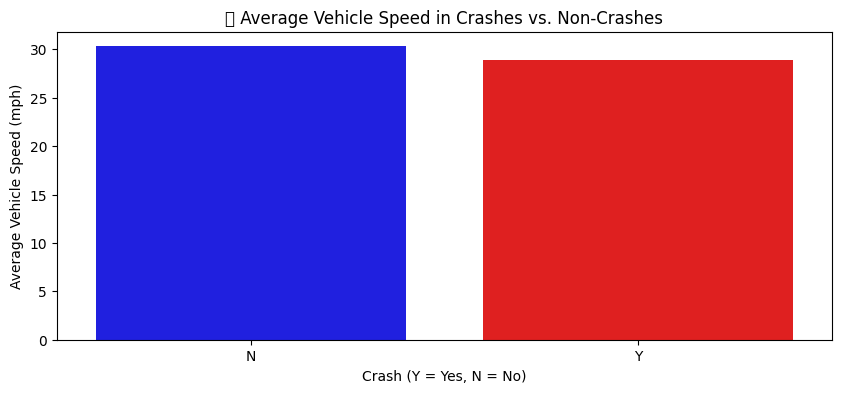

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean vehicle speed for crash vs. non-crash cases
avg_speed_by_crash = df.groupby('CRASH')['VEH_SPEED'].mean()

# Plot comparison
plt.figure(figsize=(10,4))
sns.barplot(x=avg_speed_by_crash.index, y=avg_speed_by_crash.values, palette=['blue', 'red'])
plt.title("🚗 Average Vehicle Speed in Crashes vs. Non-Crashes")
plt.xlabel("Crash (Y = Yes, N = No)")
plt.ylabel("Average Vehicle Speed (mph)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



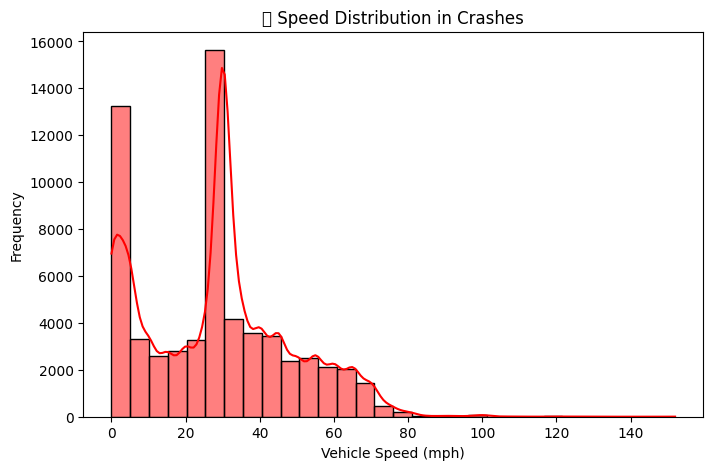

In [98]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['CRASH'] == 'Y']['VEH_SPEED'], bins=30, kde=True, color='red')
plt.title("🚗 Speed Distribution in Crashes")
plt.xlabel("Vehicle Speed (mph)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-99-3c8c7c1f27bc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




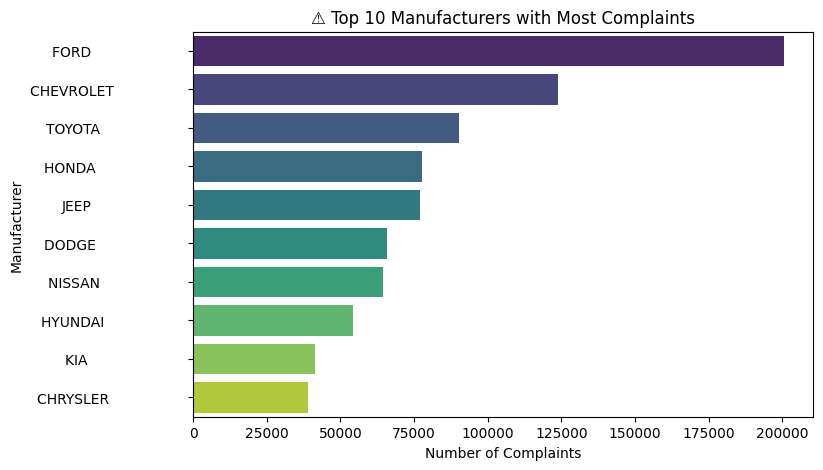

In [99]:
top_makes = df['MAKETXT'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_makes.index, x=top_makes.values, palette="viridis")
plt.title("⚠️ Top 10 Manufacturers with Most Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Manufacturer")
plt.show()

<ipython-input-100-63661c8054e4>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.



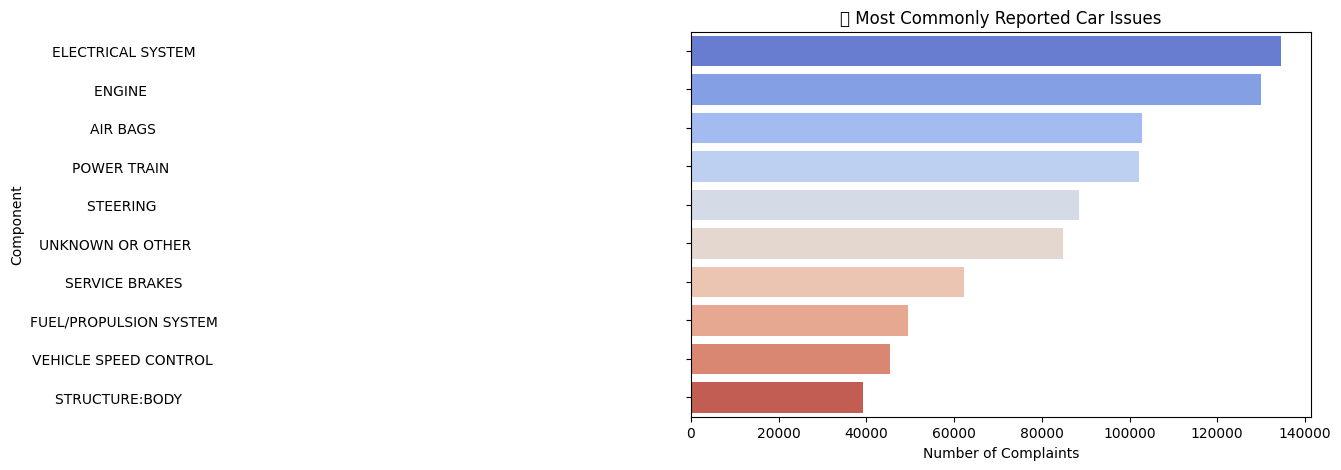

In [100]:
top_components = df['COMPDESC'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_components.index, x=top_components.values, palette="coolwarm")
plt.title("🔧 Most Commonly Reported Car Issues")
plt.xlabel("Number of Complaints")
plt.ylabel("Component")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.



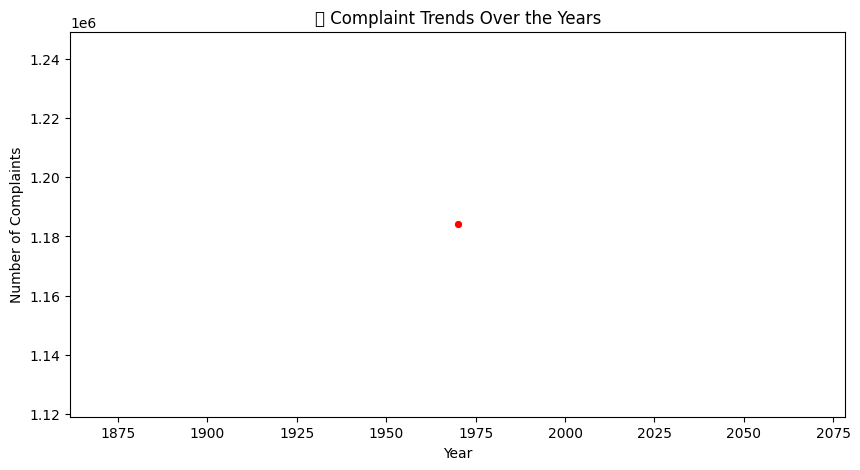

In [101]:
df['FAILDATE'] = pd.to_datetime(df['FAILDATE'], errors='coerce')  # Convert date column
df['Year'] = df['FAILDATE'].dt.year  # Extract year

complaints_over_time = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=complaints_over_time.index, y=complaints_over_time.values, marker="o", color="red")
plt.title("📅 Complaint Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.show()

#**Fire & Fatality Analysis**#

<ipython-input-102-734237d09fda>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



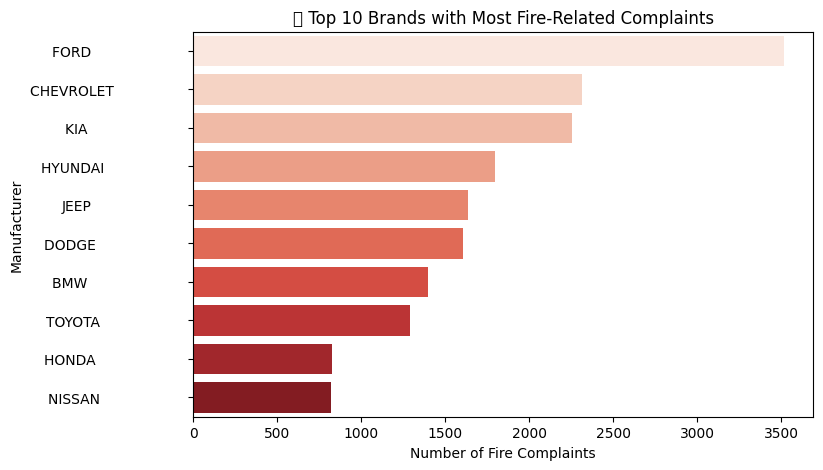

In [102]:
fire_counts = df[df['FIRE'] == 'Y']['MAKETXT'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=fire_counts.index, x=fire_counts.values, palette="Reds")
plt.title("🔥 Top 10 Brands with Most Fire-Related Complaints")
plt.xlabel("Number of Fire Complaints")
plt.ylabel("Manufacturer")
plt.show()

##**Injury/Fatality Distribution**##

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128657 (\N{AMBULANCE}) missing from font(s) DejaVu Sans.



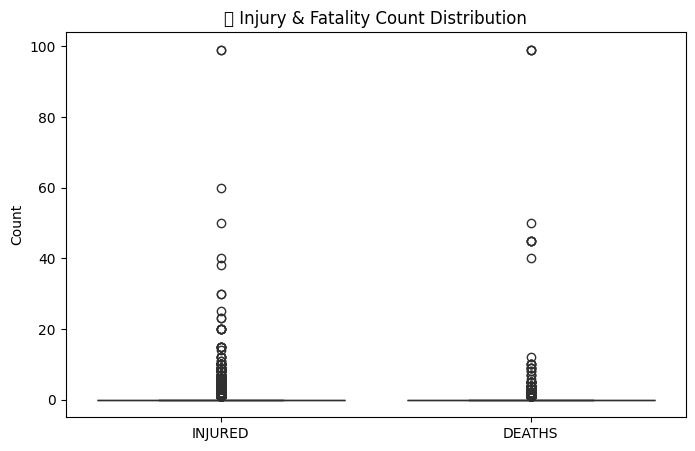

In [103]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['INJURED', 'DEATHS']], palette="magma")
plt.title("🚑 Injury & Fatality Count Distribution")
plt.ylabel("Count")
plt.show()

#**Speed vs. Fatalities/Injuries - Does Speed Kill?**#

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



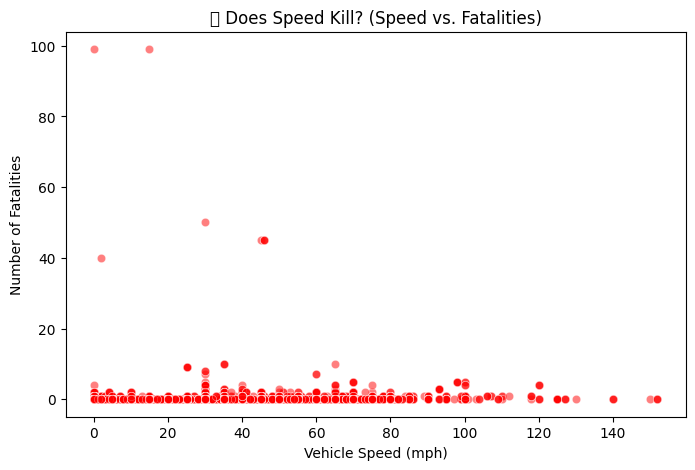

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only crash cases
crash_df = df[df['CRASH'] == 'Y']

plt.figure(figsize=(8,5))
sns.scatterplot(data=crash_df, x='VEH_SPEED', y='DEATHS', alpha=0.5, color="red")
plt.title("🚗 Does Speed Kill? (Speed vs. Fatalities)")
plt.xlabel("Vehicle Speed (mph)")
plt.ylabel("Number of Fatalities")
plt.show()

#**What Car Components Are the Most Dangerous as per consumers ?**#

Some vehicle parts are more likely to be involved in crashes, fires, or fatalities.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.



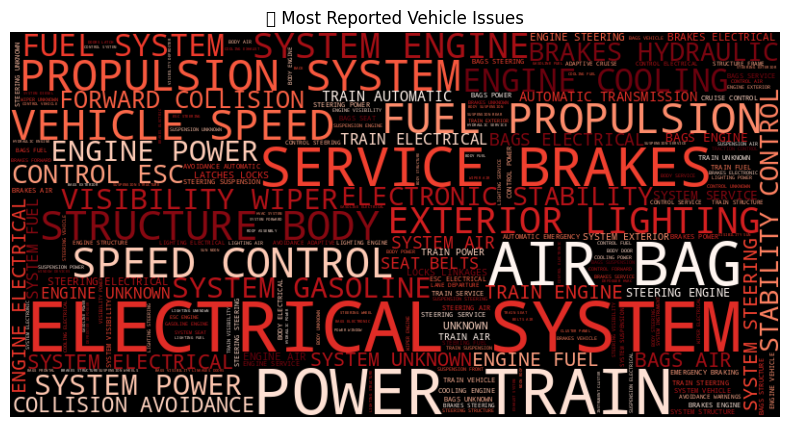

In [105]:
from wordcloud import WordCloud

text = " ".join(df['COMPDESC'].dropna().astype(str))  # Combine all complaint descriptions
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🛠️ Most Reported Vehicle Issues")
plt.show()

<ipython-input-106-6984a13d14e1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.



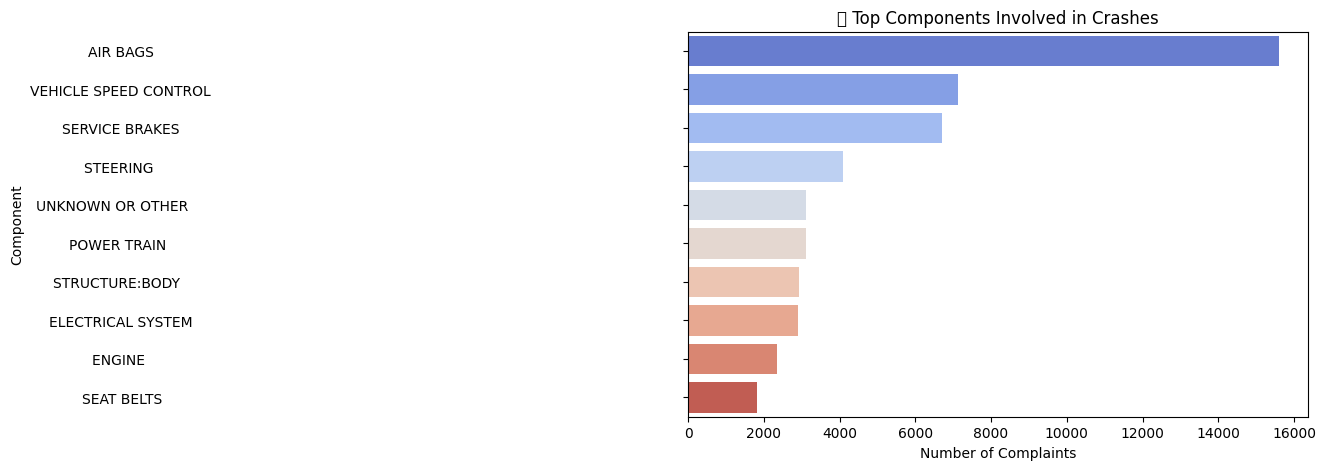

In [106]:
crash_components = df[df['CRASH'] == 'Y']['COMPDESC'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=crash_components.index, x=crash_components.values, palette="coolwarm")
plt.title("🚨 Top Components Involved in Crashes")
plt.xlabel("Number of Complaints")
plt.ylabel("Component")
plt.show()

In [107]:
!pip install plotly pandas numpy

###**Recall**###

In [113]:
dataset_path1 = "/content/drive/My Drive/prog for ba /FLAT_RCL_processed_cleaned.csv"

In [114]:
df1 = pd.read_csv(dataset_path1)

<ipython-input-114-c71979df7f86>:1: DtypeWarning:

Columns (17,18,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.



In [115]:
df1.head()

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPDESC,MFGNAME,BGMAN,ENDMAN,...,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,MFR_COMP_NAME,MFR_COMP_DESC,MFR_COMP_PTNO
0,1,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215021000000202,NaN,NaN,NaN
1,2,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215022000000202,NaN,NaN,NaN
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015210000106403000000349,NaN,NaN,NaN
3,4,02V237000,HOLIDAY RAMBLER,ENDEAVOR,2000,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000083965000000272,NaN,NaN,NaN
4,5,02V237000,HOLIDAY RAMBLER,ENDEAVOR,1999,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000080938000000272,NaN,NaN,NaN


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291832 entries, 0 to 291831
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RECORD_ID          291832 non-null  int64  
 1   CAMPNO             291832 non-null  object 
 2   MAKETXT            291832 non-null  object 
 3   MODELTXT           291832 non-null  object 
 4   YEARTXT            291832 non-null  int64  
 5   MFGCAMPNO          169868 non-null  object 
 6   COMPDESC           291832 non-null  object 
 7   MFGNAME            291827 non-null  object 
 8   BGMAN              120782 non-null  float64
 9   ENDMAN             121024 non-null  float64
 10  RCLTYPECD          291832 non-null  object 
 11  POTAFF             291546 non-null  float64
 12  ODATE              258571 non-null  float64
 13  INFLUENCED_BY      291832 non-null  object 
 14  MFGTXT             291832 non-null  object 
 15  RCDATE             291832 non-null  int64  
 16  DA

**General Recall Information**

	1.	RECORD_ID → Unique ID for each recall record.
	2.	CAMPNO → The official campaign number assigned by NHTSA.
	3.	MAKETXT → Manufacturer name (e.g., Ford, Toyota, BMW).
	4.	MODELTXT → The vehicle model (e.g., Camry, F-150, Civic).
	5.	YEARTXT → Model year of the recalled vehicle.

⸻

**Manufacturer & Defect Details**

	6.	MFGCAMPNO → Manufacturer’s internal recall campaign number (not always available).
	7.	COMPDESC → Component affected (e.g., Brakes, Engine, Airbags).
	8.	MFGNAME → Name of the vehicle manufacturer.
	9.	BGMAN → Beginning manufacture date of affected vehicles (when production started).
	10.	ENDMAN → End manufacture date of affected vehicles (when production stopped).



**🔄 Recall Classification & Scale**

	11.	RCLTYPECD → Recall type code (e.g., vehicle, tire, equipment).
	12.	POTAFF → Potentially affected vehicles (estimated number of vehicles impacted).
	13.	ODATE → Recall order date (when the recall was officially announced).
	14.	INFLUENCED_BY → What influenced the recall (e.g., government, safety concerns).
	15.	MFGTXT → Text description of the manufacturer responsible for the recall.



**📆 Timeline & Regulatory Information**

	16.	RCDATE → Date recall was recorded by NHTSA.
	17.	DATEA → Date recall became active (actual implementation).
	18.	RPNO → Regulation number under which recall was issued (only for regulatory recalls).
	19.	FMVSS → Federal Motor Vehicle Safety Standard (FMVSS) reference number, if applicable.


 **Recall Description & Consequences**

	20.	DESC_DEFECT → Description of the defect (e.g., “Faulty brake pads may cause failure”).
	21.	CONEQUENCE_DEFECT → Potential consequences of the defect (e.g., “Increased risk of crash”).
	22.	CORRECTIVE_ACTION → Manufacturer’s fix for the defect (e.g., “Free replacement of parts”).
	23.	NOTES → Additional notes about the recall.



**Manufacturer-Specific Component Information**

	24.	RCL_CMPT_ID → Unique component ID assigned to the recalled part.
	25.	MFR_COMP_NAME → Manufacturer component name (e.g., “Bosch Fuel Pump”).
	26.	MFR_COMP_DESC → Description of the recalled component (e.g., “Fuel Pump Assembly”).
	27.	MFR_COMP_PTNO → Manufacturer’s part number for the recalled component.

In [117]:
# Check percentage of missing values
missing_percent = (df1.isnull().sum() / len(df1)) * 100
missing_df = missing_percent.to_frame().reset_index()
missing_df.columns = ["Column", "Missing Percentage"]
missing_df = missing_df.sort_values(by="Missing Percentage", ascending=False)

# Display missing values
print(missing_df)

               Column  Missing Percentage
17               RPNO           93.926300
18              FMVSS           76.480989
8               BGMAN           58.612489
9              ENDMAN           58.529565
26      MFR_COMP_PTNO           53.973862
25      MFR_COMP_DESC           53.453699
24      MFR_COMP_NAME           52.258834
5           MFGCAMPNO           41.792538
12              ODATE           11.397311
20  CONEQUENCE_DEFECT            6.041490
19        DESC_DEFECT            2.818402
21  CORRECTIVE_ACTION            2.788248
11             POTAFF            0.098002
22              NOTES            0.090806
7             MFGNAME            0.001713
1              CAMPNO            0.000000
0           RECORD_ID            0.000000
2             MAKETXT            0.000000
6            COMPDESC            0.000000
10          RCLTYPECD            0.000000
3            MODELTXT            0.000000
4             YEARTXT            0.000000
14             MFGTXT            0

In [118]:
# Count duplicate rows
duplicate_count = df1.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


In [119]:
# Convert date columns
date_columns = ['ODATE', 'RCDATE', 'DATEA']
for col in date_columns:
    df1[col] = pd.to_datetime(df1[col], errors='coerce')

# Convert POTAFF (potentially affected vehicles) to integer
df1['POTAFF'] = df1['POTAFF'].fillna(0).astype(int)

# Verify changes
print(df1.dtypes)

RECORD_ID                     int64
CAMPNO                       object
MAKETXT                      object
MODELTXT                     object
YEARTXT                       int64
MFGCAMPNO                    object
COMPDESC                     object
MFGNAME                      object
BGMAN                       float64
ENDMAN                      float64
RCLTYPECD                    object
POTAFF                        int64
ODATE                datetime64[ns]
INFLUENCED_BY                object
MFGTXT                       object
RCDATE               datetime64[ns]
DATEA                datetime64[ns]
RPNO                         object
FMVSS                        object
DESC_DEFECT                  object
CONEQUENCE_DEFECT            object
CORRECTIVE_ACTION            object
NOTES                        object
RCL_CMPT_ID                  object
MFR_COMP_NAME                object
MFR_COMP_DESC                object
MFR_COMP_PTNO                object
dtype: object


In [120]:
# Extract year from RCDATE and check range
df1['Year'] = df1['RCDATE'].dt.year
print(f"Minimum Recall Year: {df1['Year'].min()}")
print(f"Maximum Recall Year: {df1['Year'].max()}")

Minimum Recall Year: 1970
Maximum Recall Year: 1970


In [121]:
# Check unique values in categorical columns
print("Unique Recall Types:", df1['RCLTYPECD'].unique())
print("Unique Influenced By:", df1['INFLUENCED_BY'].unique())

Unique Recall Types: ['V' 'E' 'T' 'X' 'C' 'I']
Unique Influenced By: ['ODI' 'MFR' 'OVSC']


In [122]:
# Function to find columns that might contain dates
def check_possible_dates(dataframe, dataset_name):
    print(f"\n🔍 Checking possible date columns in {dataset_name}...\n")
    for col in dataframe.columns:
        if any(keyword in col.lower() for keyword in ['date', 'year', 'odate', 'rcdate', 'faildate']):
            print(f"📅 Column: {col}")
            print(f"  ➤ Min: {dataframe[col].min()}, Max: {dataframe[col].max()}\n")

# Run the check on both datasets
check_possible_dates(df, "Complaints Data (df)")
check_possible_dates(df1, "Recalls Data (df1)")


🔍 Checking possible date columns in Complaints Data (df)...

📅 Column: YEARTXT
  ➤ Min: 1995.0, Max: 2025.0

📅 Column: FAILDATE
  ➤ Min: 1970-01-01 00:00:00.000060810, Max: 1970-01-01 00:00:00.020250127

📅 Column: LDATE
  ➤ Min: 2010-01-01, Max: 2025-01-27

📅 Column: Year
  ➤ Min: 1970, Max: 1970


🔍 Checking possible date columns in Recalls Data (df1)...

📅 Column: YEARTXT
  ➤ Min: 1949, Max: 9999

📅 Column: ODATE
  ➤ Min: 1970-01-01 00:00:00.011111111, Max: 1970-01-01 00:00:00.020250124

📅 Column: RCDATE
  ➤ Min: 1970-01-01 00:00:00.019660119, Max: 1970-01-01 00:00:00.020250124

📅 Column: DATEA
  ➤ Min: 1970-01-01 00:00:00.019791012, Max: 1970-01-01 00:00:00.020250124

📅 Column: Year
  ➤ Min: 1970, Max: 1970



#**Top 10 Manufacturers with Most Recalls**#

<ipython-input-123-9aafb3e7b336>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.



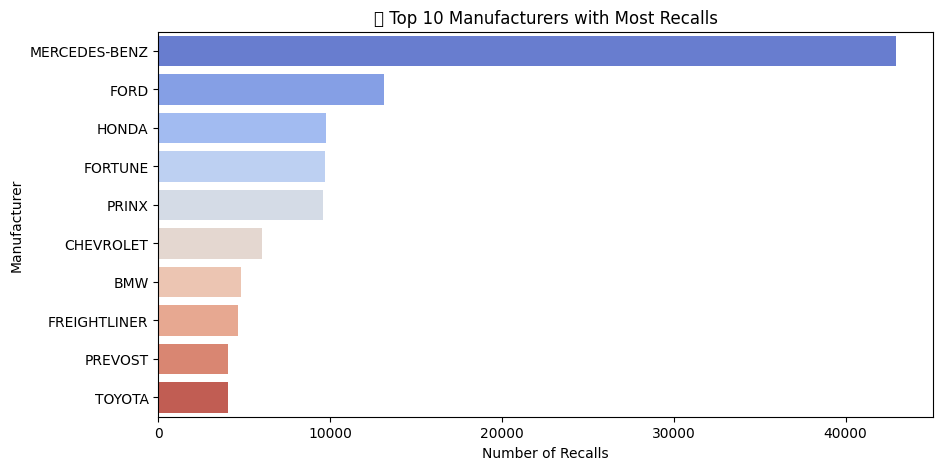

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count recalls per manufacturer
top_makes = df1['MAKETXT'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_makes.index, x=top_makes.values, palette="coolwarm")
plt.title("🚗 Top 10 Manufacturers with Most Recalls")
plt.xlabel("Number of Recalls")
plt.ylabel("Manufacturer")
plt.show()

##**Most Recalled Vehicle Components**#

<ipython-input-124-3f32e471b749>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.



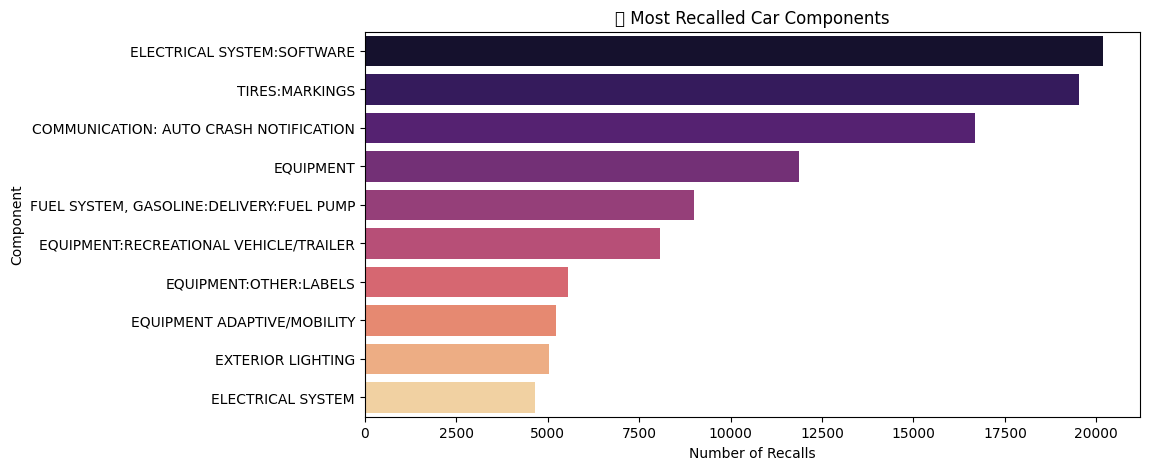

In [124]:
# Count recalls by component
top_components = df1['COMPDESC'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_components.index, x=top_components.values, palette="magma")
plt.title("🔧 Most Recalled Car Components")
plt.xlabel("Number of Recalls")
plt.ylabel("Component")
plt.show()

#**Which Vehicles Were Most Affected?**#

<ipython-input-125-e2ce73bc9b10>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.



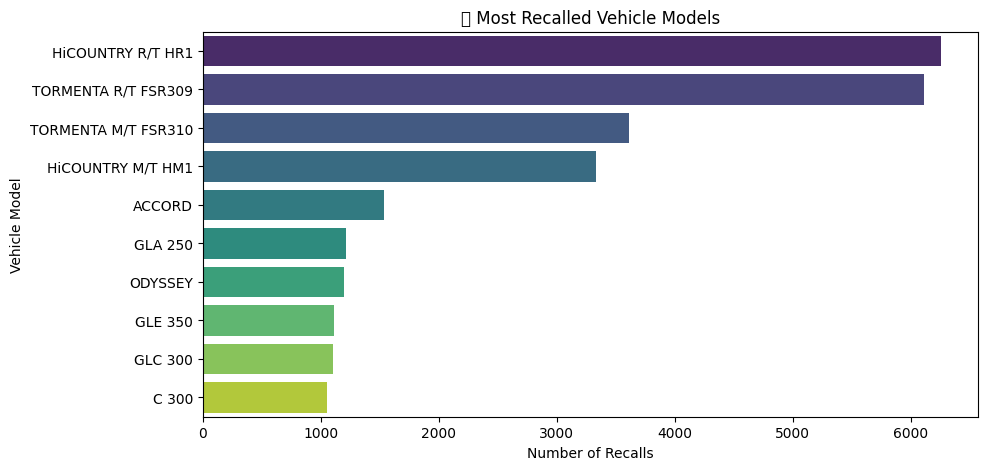

In [125]:
# Count recalls by vehicle model
top_models = df1['MODELTXT'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_models.index, x=top_models.values, palette="viridis")
plt.title("🏆 Most Recalled Vehicle Models")
plt.xlabel("Number of Recalls")
plt.ylabel("Vehicle Model")
plt.show()

#**Most Severe Recalls – Based on Consequences**#

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



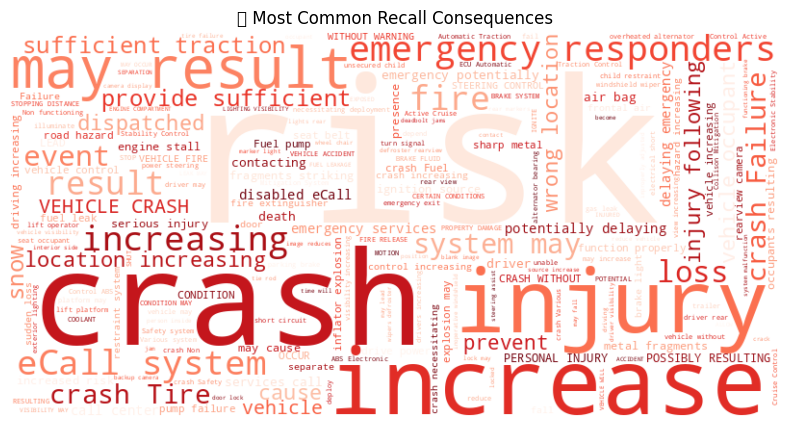

In [128]:
from wordcloud import WordCloud

# Combine all defect consequence descriptions
text = " ".join(df1['CONEQUENCE_DEFECT'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(text)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🔥 Most Common Recall Consequences")
plt.show()

#**Deadliest Recalls – Which Recalls Were the Most Dangerous?**#

<ipython-input-130-68f64da63d83>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.



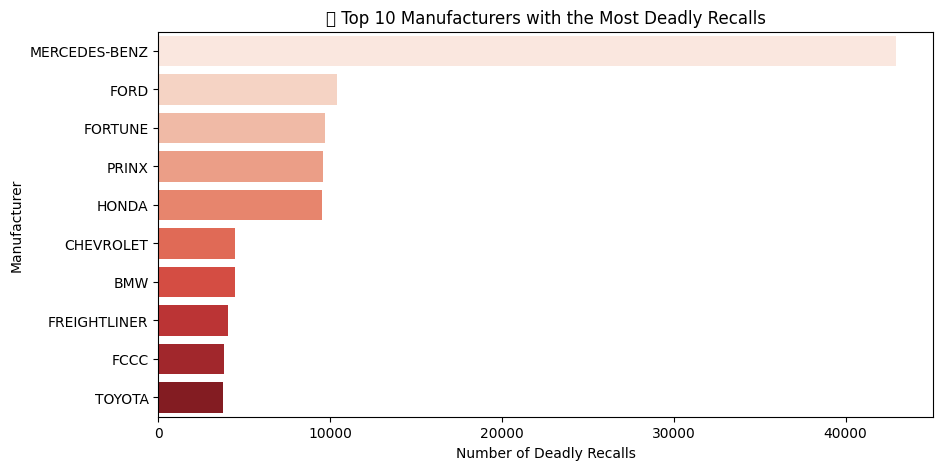

In [130]:
# Find recalls mentioning "fire", "crash", or "death" in consequences
df1['SEVERE_RECALL'] = df1['CONEQUENCE_DEFECT'].str.contains("fire|crash|death|injury|fatal", case=False, na=False)

# Count how many recalls per manufacturer had deadly consequences
severe_recalls = df1[df1['SEVERE_RECALL']].groupby('MAKETXT').size().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=severe_recalls.index, x=severe_recalls.values, palette="Reds")
plt.title("💀 Top 10 Manufacturers with the Most Deadly Recalls")
plt.xlabel("Number of Deadly Recalls")
plt.ylabel("Manufacturer")
plt.show()

#**Recall Patterns – Are Some Manufacturers More Prone to Recalls?**#

<ipython-input-131-445bd6666ee7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



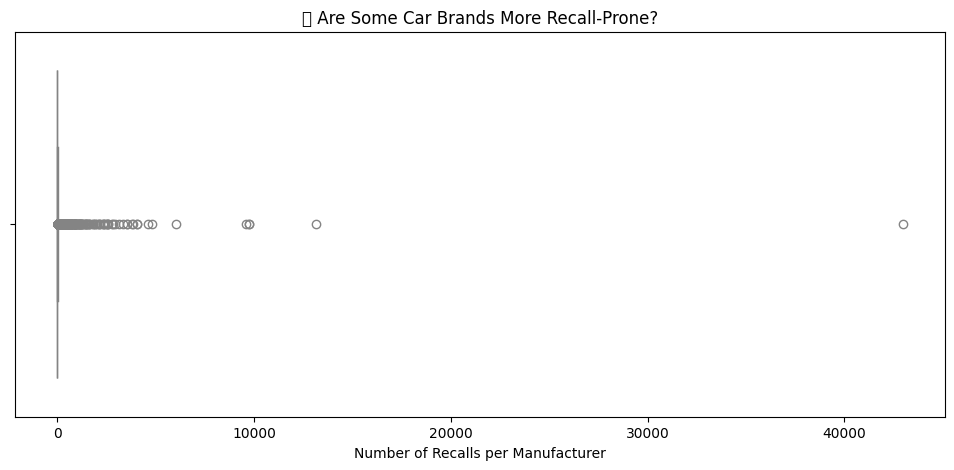

In [131]:
# Count recalls per manufacturer
recall_counts = df1['MAKETXT'].value_counts()

plt.figure(figsize=(12,5))
sns.boxplot(data=recall_counts, orient="h", palette="coolwarm")
plt.title("📊 Are Some Car Brands More Recall-Prone?")
plt.xlabel("Number of Recalls per Manufacturer")
plt.show()

#**The Most Recalled Car Model of All Time**#

<ipython-input-132-fab41ca02ded>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.



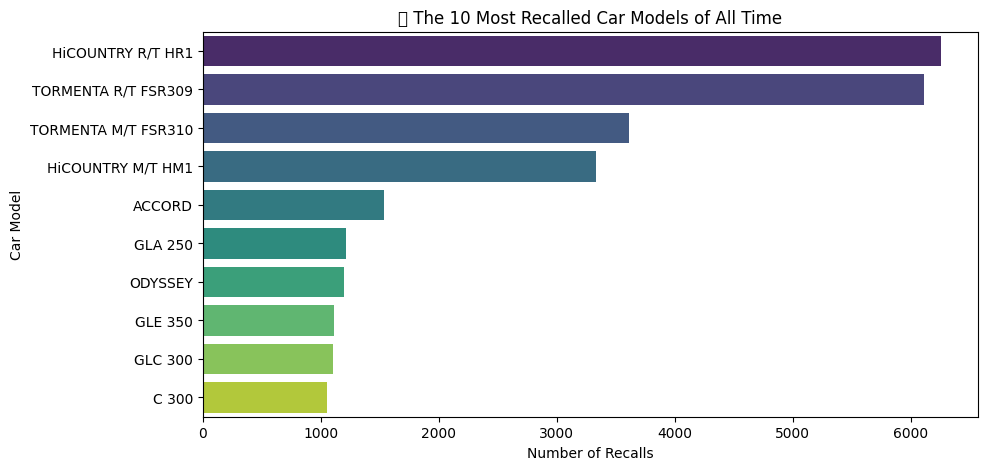

In [132]:
# Count recalls per vehicle model
top_models = df1['MODELTXT'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_models.index, x=top_models.values, palette="viridis")
plt.title("🚘 The 10 Most Recalled Car Models of All Time")
plt.xlabel("Number of Recalls")
plt.ylabel("Car Model")
plt.show()

#**The Most Recalled Car Part in History**##

<ipython-input-135-bee98763d325>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




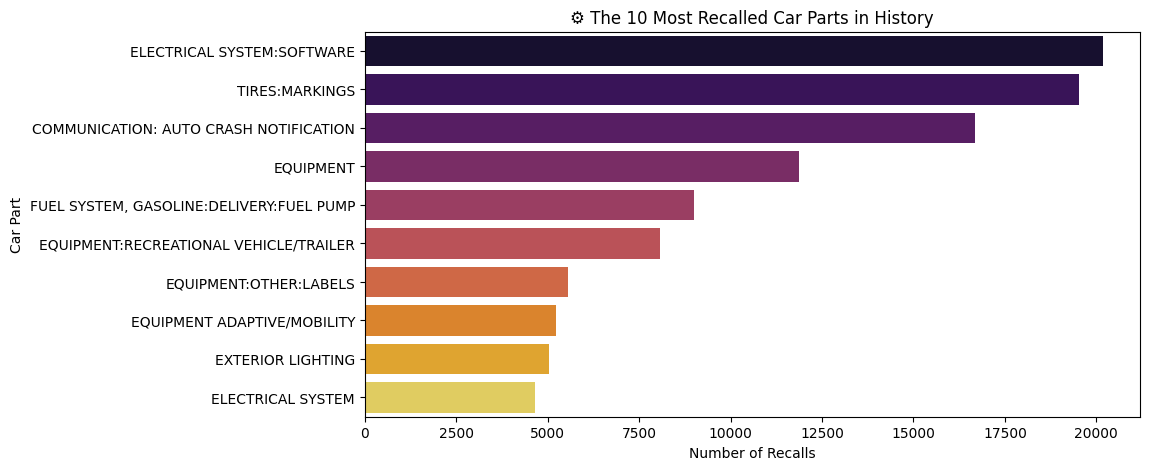

In [135]:
# Count recalls by component
top_parts = df1['COMPDESC'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_parts.index, x=top_parts.values, palette="inferno")
plt.title("⚙️ The 10 Most Recalled Car Parts in History")
plt.xlabel("Number of Recalls")
plt.ylabel("Car Part")
plt.show()

##**Top 20 Recall Prone Brands**##

<ipython-input-137-ede125ca3e0c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




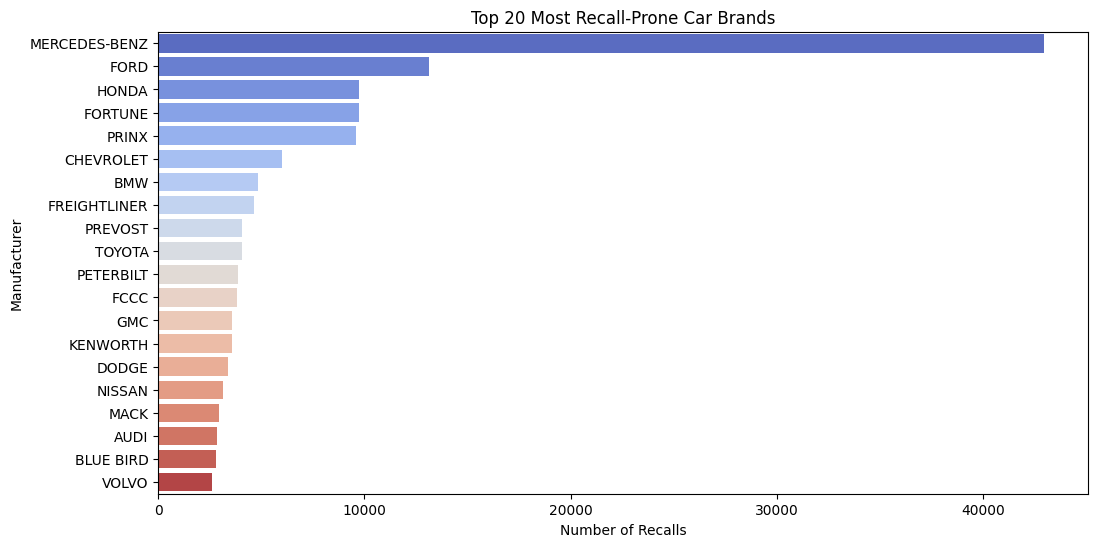

In [137]:
top_20_brands = df1['MAKETXT'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(y=top_20_brands.index, x=top_20_brands.values, palette="coolwarm")
plt.title("Top 20 Most Recall-Prone Car Brands")
plt.xlabel("Number of Recalls")
plt.ylabel("Manufacturer")
plt.show()